<a href="https://colab.research.google.com/github/ZhangYizhe/PythonForDataAnalysis/blob/main/HK_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/CLMMAXT_HKO_.csv')
df['年/Year'] = df['年/Year'].astype('string')
df['月/Month'] = df['月/Month'].astype('string')
df['日/Day'] = df['日/Day'].astype('string')

In [ ]:
df['date'] = df['日/Day'] + '/' + df['月/Month'] + '/' + df['年/Year']
df['date'] = df['date'].astype('object')
df = df.drop(columns=['年/Year', '月/Month', '日/Day', '數據完整性/data Completeness'])
df.set_index('date', inplace=True)
df = df.rename(columns={'數值/Value':'temperature'})
df['temperature'] = df['temperature'].replace('***', np.nan)
df.head()

,temperature
date,
1/1/1884,15.3
2/1/1884,17.1
3/1/1884,19.6
4/1/1884,23.2
5/1/1884,19.4


In [ ]:
df['temperature'] = df['temperature'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47542 entries, 1/1/1884 to 28/2/2021
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  47541 non-null  float64
dtypes: float64(1)
memory usage: 742.8+ KB


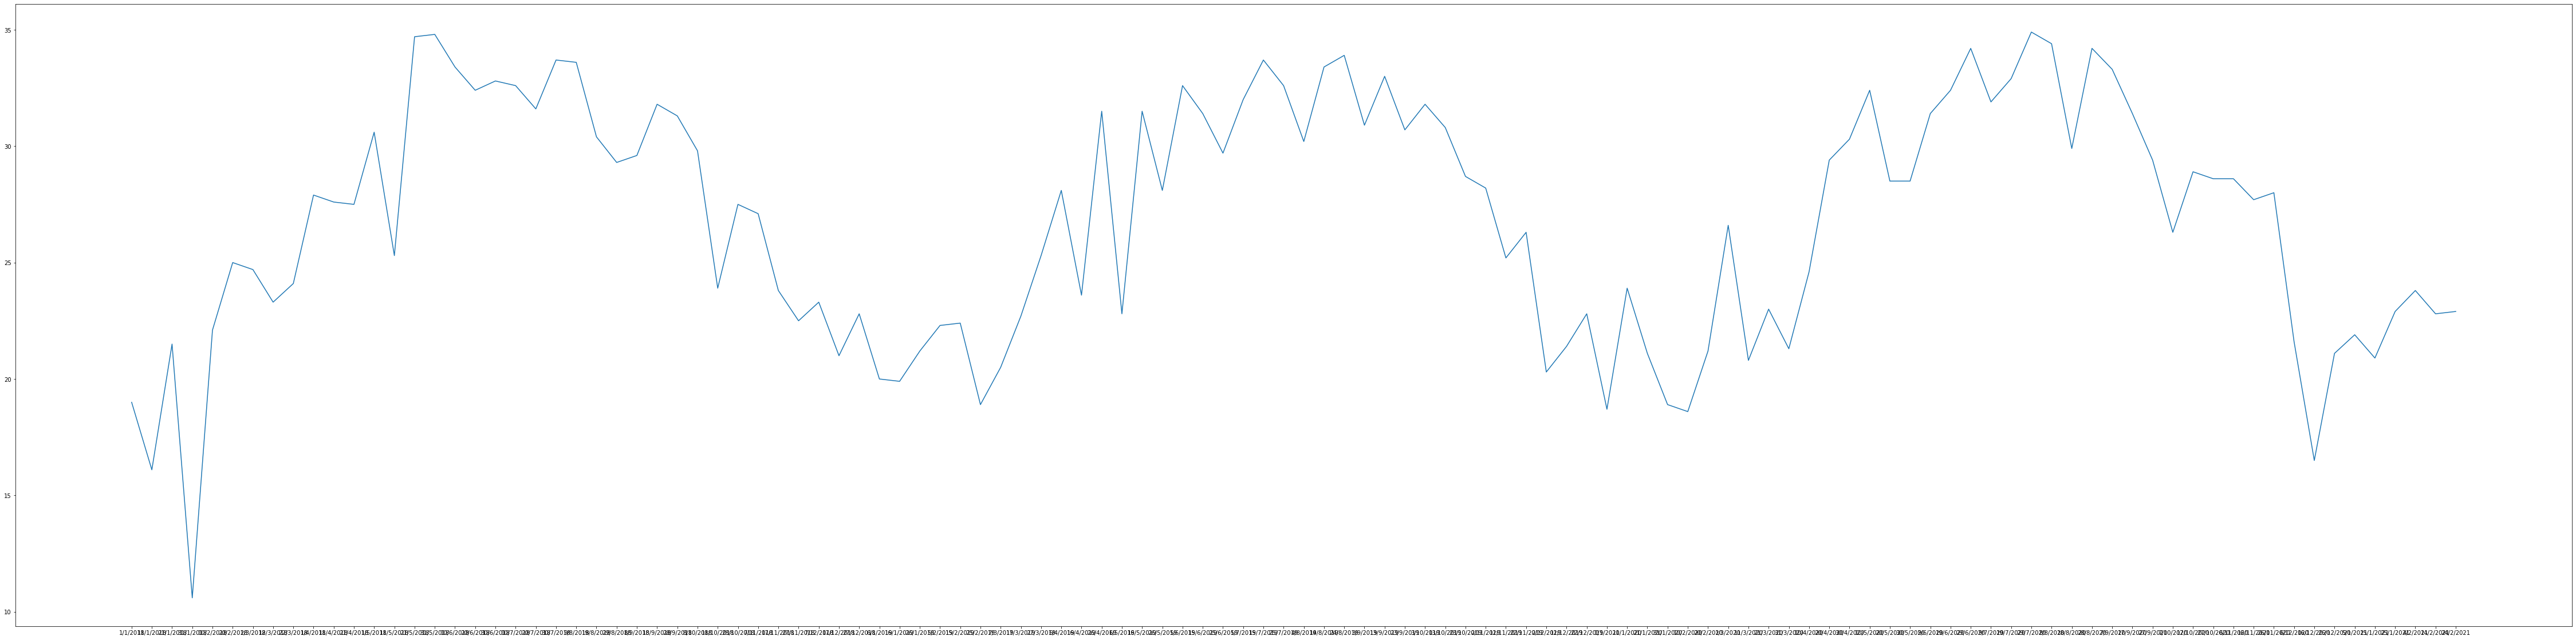

In [ ]:
figure = plt.figure(figsize=(80, 20))
plt.plot(df['1/1/2018'::10])